In [33]:
import numpy as np
from scipy.stats import bernoulli, binom
import matplotlib.pyplot as plt

Suppose $X \sim \operatorname{Bernoulli}(\theta)$ is a Bernoulli random variable where the parameter $\theta$ is unknown.


In [34]:
theta = 0.6

Let $X_1, \ldots, X_n$ be a sample. Then 

$\overline X = \frac{1}{n}\big(X_1 + \ldots + X_n\big)$

gives an unbiased consistent estimate of the parameter $\theta$.

Hodges–Lehmann estimator gives

$\theta_{HL} = \overline X + \frac{1}{1+\sqrt{n}} \big( \frac12 - \overline X\big).$

In [35]:
def hl_estimate(mean, sample_size):
    return mean + 1/(1 + np.sqrt(sample_size))*(1/2 - mean)

This estimate of $\theta$ is consistent, but not unbiased. It is not hard to see from the formula, that $\theta_{HL}$ is closer to $\frac12$, than $\overline X$.

In [36]:
n_tosses = 10

X = bernoulli(theta)
X_samples = X.rvs(n_tosses)
#sns.histplot(X_samples, stat="density", discrete=True, shrink=0.2);

In [37]:
avg_theta = sum(X_samples/n_tosses)
hl_theta = hl_estimate(avg_theta, n_tosses)
print(f"mean = {avg_theta}, Hodges–Lehmann estimate = {hl_theta}")

mean = 0.6, Hodges–Lehmann estimate = 0.5759746926647957


**Claim:** Hodges–Lehmann estimator optimizes the mean squared error.

In [38]:
print(f"square error for the mean = {'{:e}'.format((avg_theta - theta)**2)}")
print(f"for Hodges–Lehmann = {'{:e}'.format((hl_theta - theta)**2)}")

square error for the mean = 0.000000e+00
for Hodges–Lehmann = 5.772154e-04


In [39]:
def mse(arr, true_mean): #mean square error
    n = len(arr)
    return sum((x- true_mean)**2 for x in arr)/n

def mae(arr, true_mean): #mean absolute error
    n = len(arr)
    return sum(abs(x- true_mean) for x in arr)/n

In [42]:
num_simulations = 100
means = []
hl_means = []

for _ in range(num_simulations):
    X_samples = X.rvs(n_tosses)
    avg_theta = sum(X_samples/n_tosses)
    hl_theta = hl_estimate(avg_theta, n_tosses)
    means.append(avg_theta)
    hl_means.append(hl_theta)

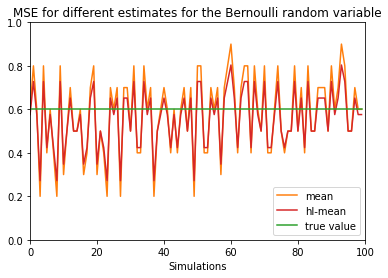

MSE for the mean = 3.240000e-02
MSE for Hodges–Lehmann = 2.008213e-02
MAE for the mean = 1.480000e-01
MAE for Hodges–Lehmann = 1.167671e-01


In [43]:
fig = plt.figure()
plt.title('MSE for different estimates for the Bernoulli random variable')
plt.xlabel("Simulations")
plt.xlim([0, num_simulations])
plt.ylim([0, 1])
plt.plot(range(num_simulations), means, 'C1', label='mean')
plt.plot(range(num_simulations), hl_means,  'C3', label='hl-mean')
plt.plot(range(num_simulations), [theta]*num_simulations,  'C2', label='true value')
    
plt.legend()
plt.show()
print(f"MSE for the mean = {'{:e}'.format(mse(means, theta))}")
print(f"MSE for Hodges–Lehmann = {'{:e}'.format(mse(hl_means, theta))}")
print(f"MAE for the mean = {'{:e}'.format(mae(means, theta))}")
print(f"MAE for Hodges–Lehmann = {'{:e}'.format(mae(hl_means, theta))}")